Data mining CA 2

Group members:
Durga Gurajala - 10612928

Sonal Shetty - 20004499

Unnimaya Sivadas - 20000777

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [2]:
data = pd.read_csv("Lead Scoring.csv")

# Data Understanding

In [3]:
#Understanding the dataset dimensions
data.shape

(9240, 37)

In [4]:
#Checking for duplicates
print("Number of duplicate rows: ", data.duplicated().sum())

Number of duplicate rows:  0


In [5]:
#Exploring the dataframe
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Checking the null value counts and column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Get the statistical data description for numerical data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Double checking for null counts
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filter to only columns with missing values
print(null_counts)

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64


# Data Preparation

In [9]:
#We observed that a lot of rows have default dropdown value 'Select' as the value so we will convert these to Null
data = data.replace('Select', np.nan)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Checking the percentage of null values and dropping them if null% > 50
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
data = data.drop(data.loc[:, list(round(100 * (data.isnull().sum() / len(data.index)), 2) > 50)].columns, axis=1)

In [12]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
#Dropping columns Prospect ID and Lead Number as they are ID type columns and irrelevant for analysis

data.drop(['Prospect ID', 'Lead Number', 'Tags'], axis=1, inplace=True)


In [14]:
#Dropping Last Notable Activity as it is a replica of column Last Activity
data = data.drop('Last Notable Activity',axis=1)

In [15]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No


#Columns Asymmetric Indexes and scores are assigned values to each customer. 
#They have about 45% null values which mean that about half of them are null and so handling these columns would skew the data
#We have chosen to drop these columns

In [16]:
data.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
           'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1, inplace=True)


In [17]:
#Rechecking null values to handle
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [18]:
data.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [19]:
#Dropping City column as it is imbalanced and will be skewed if imputed
data.drop("City",axis=1,inplace=True)

In [20]:
data.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

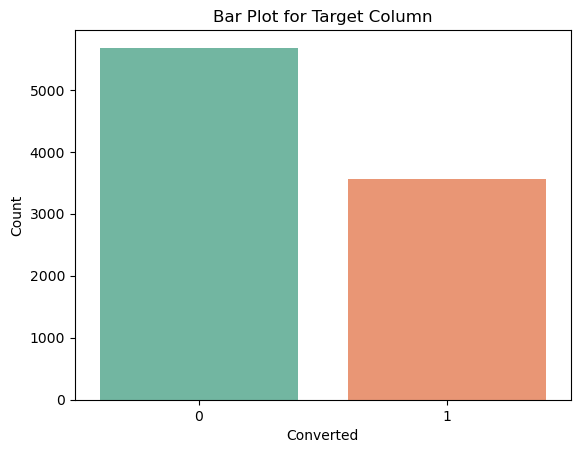

In [21]:
sns.countplot(x='Converted', data=data, palette='Set2')
plt.title('Bar Plot for Target Column')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

In [22]:
data.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

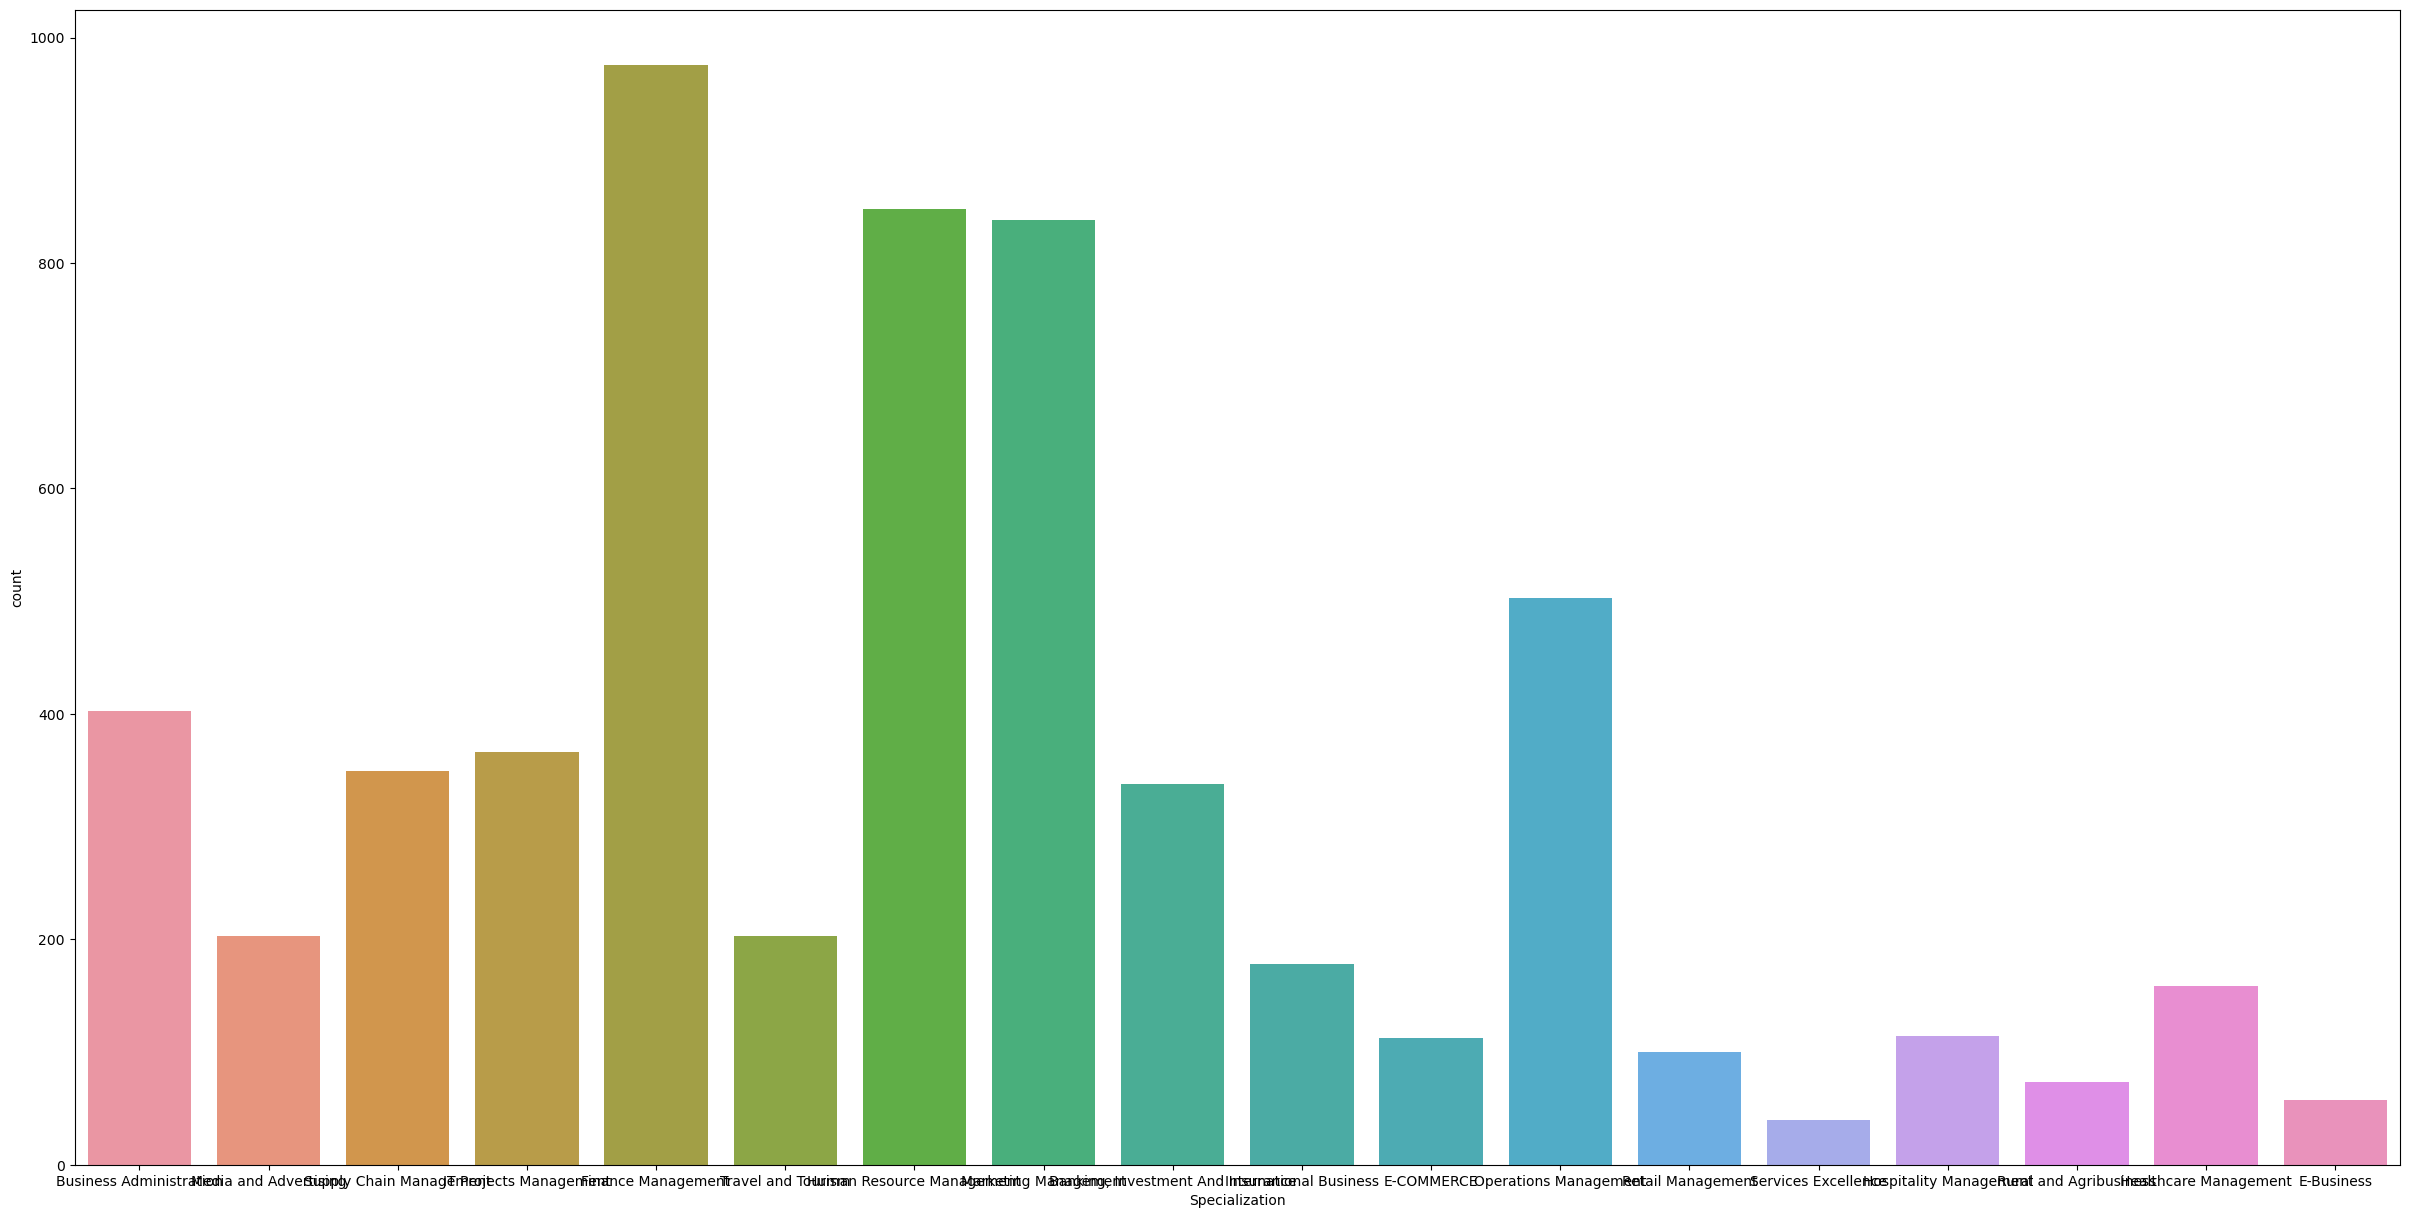

In [23]:
fig, ax = plt.subplots(1, figsize=(30,15))
for i, col in enumerate(['Specialization']):
  sns.countplot(data=data,
                x=col) 
plt.show()

In [24]:
data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [25]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

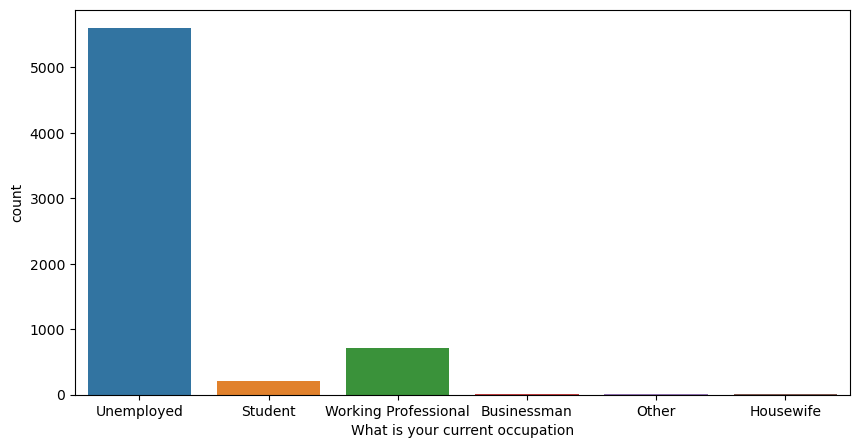

In [26]:
fig, ax = plt.subplots(1, figsize=(10,5))
for i, col in enumerate(['What is your current occupation']):
  sns.countplot(data=data,
                x=col) 
plt.show()

In [27]:
#Imputing string data with most common values
data.loc[data['Specialization'].isnull(),'Specialization']=data['Specialization'].value_counts().index[0]
data.loc[data['Country'].isnull(),'Country']=data['Country'].value_counts().index[0]
data.loc[data['What is your current occupation'].isnull(),'What is your current occupation']=data['What is your current occupation'].value_counts().index[0]

In [28]:
#Rechecking null counts
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [29]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

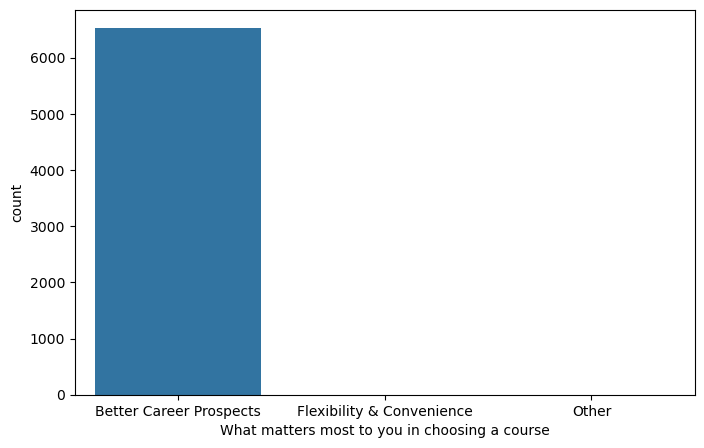

In [30]:
fig, ax = plt.subplots(1, figsize=(8,5))
for i, col in enumerate(['What matters most to you in choosing a course']):
  sns.countplot(data=data,
                x=col) 
plt.show()

In [31]:
#Drop the remaining nulls
data.dropna(inplace = True)

In [32]:
data['Lead Source'].value_counts()

Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         74
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64

In [33]:
data['Lead Source'] = data['Lead Source'].str.replace('google','Google')

In [34]:
data['Lead Source'] = data['Lead Source'].str.replace('|'.join(['Google','bing']),'Search engine').str.replace('|'.join(['youtubechannel','Facebook']),'Social Media').str.replace('|'.join(['testone','NC_EDM','Welingak Website','Direct Traffic','Press_Release','Click2call','Pay per Click Ads','welearnblog_Home','blog','Live Chat','WeLearn']),'Other')

In [35]:
data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'testone', 'Press_Release'],
      dtype=object)

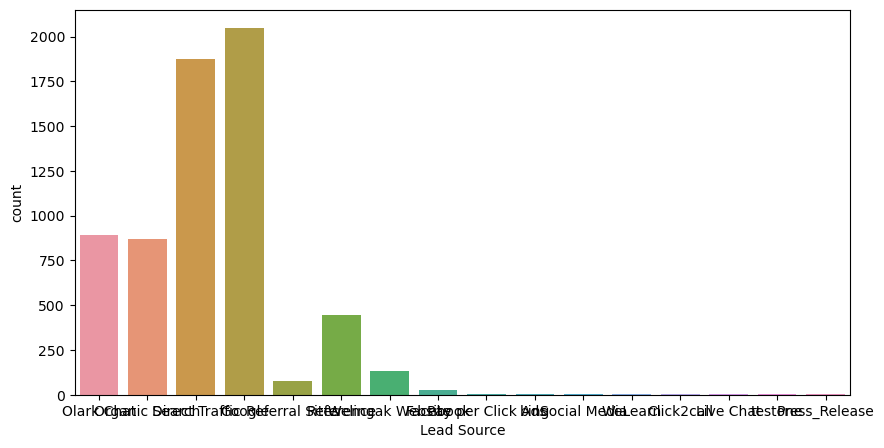

In [36]:
fig, ax = plt.subplots(1, figsize=(10,5))
for i, col in enumerate(['Lead Source']):
  sns.countplot(data=data,
                x=col) 
plt.show()

In [37]:
data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Olark Chat Conversation', 'SMS Sent',
       'Visited Booth in Tradeshow', 'Approached upfront',
       'Email Received', 'Email Marked Spam'], dtype=object)

In [38]:
data['Last Activity'] = data['Last Activity'].str.replace('|'.join(['Page Visited on Website','Email Link Clicked','Form Submitted on Website','View in browser link Clicked','Visited Booth in Tradeshow','Resubscribed to emails']),'Interested')

In [39]:
data['Last Activity'] = data['Last Activity'].str.replace('|'.join(['Email Opened','Olark Chat Conversation','Had a Phone Conversation','Approached upfront','SMS Sent','Email Received']),'Reached')

In [40]:
data['Last Activity'] = data['Last Activity'].str.replace('|'.join(['Email Bounced', 'Unsubscribed','Email Marked Spam']),'Not Interested')

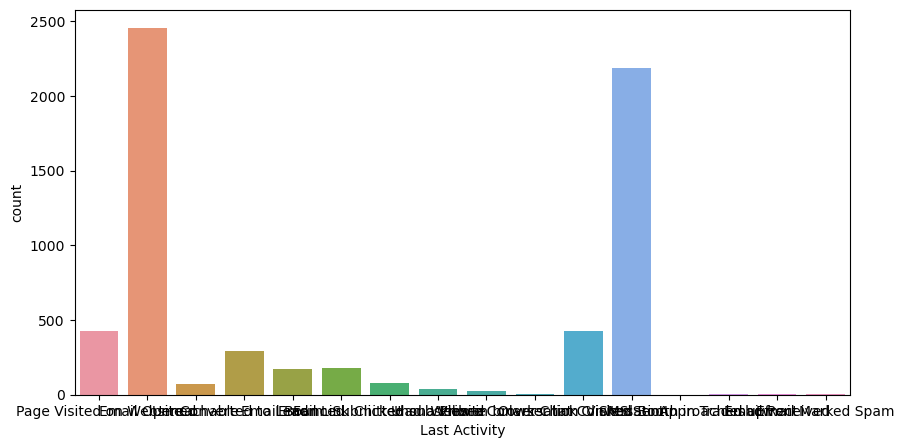

In [41]:
fig, ax = plt.subplots(1, figsize=(10,5))
for i, col in enumerate(['Last Activity']):
  sns.countplot(data=data,
                x=col) 
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Do Not Email                                   6372 non-null   object 
 3   Do Not Call                                    6372 non-null   object 
 4   Converted                                      6372 non-null   int64  
 5   TotalVisits                                    6372 non-null   float64
 6   Total Time Spent on Website                    6372 non-null   int64  
 7   Page Views Per Visit                           6372 non-null   float64
 8   Last Activity                                  6372 non-null   object 
 9   Country                                        6372 non-n

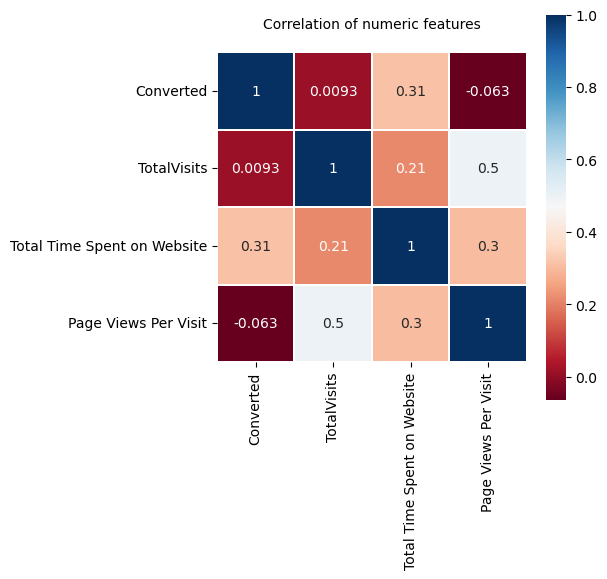

In [43]:
correlation_matrix=data.corr( numeric_only=True)
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.title("Correlation of numeric features", y=1.05, size=10)
plt.show()

In [44]:
data.drop(['TotalVisits'], axis=1, inplace=True)

In [45]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0,0.0,Page Visited on Website,India,Finance Management,...,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,674,2.5,Email Opened,India,Finance Management,...,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,1532,2.0,Email Opened,India,Business Administration,...,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,305,1.0,Unreachable,India,Media and Advertising,...,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,1428,1.0,Converted to Lead,India,Finance Management,...,No,No,No,No,No,No,No,No,No,No


In [46]:
label_encoder_age = preprocessing.LabelEncoder()
data['Lead Origin']=label_encoder_age.fit_transform(data['Lead Origin'])
data['Lead Origin'].unique()

array([0, 1, 2, 3])

In [47]:
label_encoder_age = preprocessing.LabelEncoder()
data['Lead Source']=label_encoder_age.fit_transform(data['Lead Source'])
data['Lead Source'].unique()

array([ 5,  6,  1,  3, 10,  9, 13,  2,  7, 14, 11, 12,  0,  4, 15,  8])

In [48]:
label_encoder_age = preprocessing.LabelEncoder()
data['Last Activity']=label_encoder_age.fit_transform(data['Last Activity'])
data['Last Activity'].unique()

array([10,  5, 12,  1,  2,  3,  7, 13,  8, 14,  9, 11, 15,  0,  6,  4])

In [49]:
label_encoder_age = preprocessing.LabelEncoder()
data['Country']=label_encoder_age.fit_transform(data['Country'])
data['Country'].unique()

array([10, 21, 18, 29, 31, 30,  1, 20,  0,  8, 23, 22, 25, 14,  6,  3, 16,
       26,  9,  7, 17, 28, 13, 24, 27, 15, 12,  5, 19, 32, 11,  4,  2])

In [50]:
label_encoder_age = preprocessing.LabelEncoder()
data['Specialization']=label_encoder_age.fit_transform(data['Specialization'])
data['Specialization'].unique()

array([ 4,  1, 11, 16, 17,  7, 10,  0,  9,  3, 12, 13,  8, 15,  6, 14,  5,
        2])

In [51]:
label_encoder_age = preprocessing.LabelEncoder()
data['What is your current occupation']=label_encoder_age.fit_transform(data['What is your current occupation'])
data['What is your current occupation'].unique()

array([4, 3, 5, 0, 2, 1])

In [52]:
label_encoder_age = preprocessing.LabelEncoder()
data['What matters most to you in choosing a course']=label_encoder_age.fit_transform(data['What matters most to you in choosing a course'])
data['What matters most to you in choosing a course'].unique()

array([0, 1, 2])

In [53]:
label_encoder_age = preprocessing.LabelEncoder()
data['A free copy of Mastering The Interview']=label_encoder_age.fit_transform(data['A free copy of Mastering The Interview'])
data['A free copy of Mastering The Interview'].unique()

array([0, 1])

In [54]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,5,No,No,0,0,0.0,10,10,4,...,No,No,No,No,No,No,No,No,No,0
1,0,6,No,No,0,674,2.5,5,10,4,...,No,No,No,No,No,No,No,No,No,0
2,1,1,No,No,1,1532,2.0,5,10,1,...,No,No,No,No,No,No,No,No,No,1
3,1,1,No,No,0,305,1.0,12,10,11,...,No,No,No,No,No,No,No,No,No,0
4,1,3,No,No,1,1428,1.0,1,10,4,...,No,No,No,No,No,No,No,No,No,0


In [55]:
#Saving the processed data into a single CSV file
data.to_csv("lead_scoring_cleaned.csv",index=False)

In [56]:
data = pd.get_dummies(data,drop_first=True)

In [57]:
data.Converted.value_counts()

Converted
0    3307
1    3065
Name: count, dtype: int64

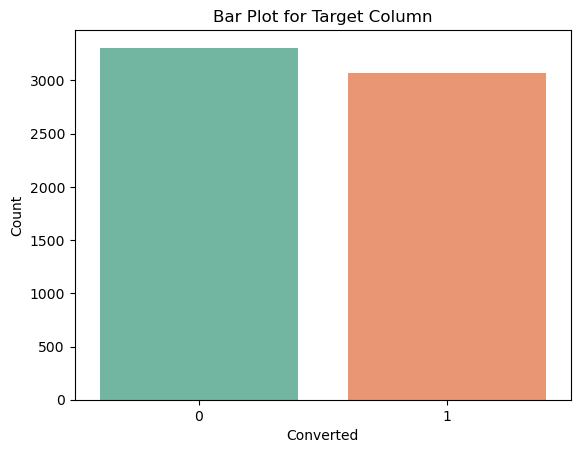

In [58]:
sns.countplot(x='Converted', data=data, palette='Set2')
plt.title('Bar Plot for Target Column')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

Finding the features that contribute most to our target variable using Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(data.drop('Converted', axis=1), data['Converted'])

# Print feature importances
pd.DataFrame({'Feature': data.drop('Converted', axis=1).columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
2,Total Time Spent on Website,0.413976
4,Last Activity,0.114268
3,Page Views Per Visit,0.113203
6,Specialization,0.102423
7,What is your current occupation,0.079008
1,Lead Source,0.076368
0,Lead Origin,0.059812
10,Do Not Email_Yes,0.014991
9,A free copy of Mastering The Interview,0.013894
5,Country,0.010647


In [60]:
#Separating the target
X = data.drop('Converted',axis = 1)
y = data['Converted']

In [61]:
from sklearn.model_selection import train_test_split
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Modelling and Evaluation

# Model: Logistic Regression Model (10-fold CV):

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4],"penalty": ['l1','l2']}]

model = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10,scoring = "f1")
model.fit(X_train, y_train)

print("Best parameters for models by cross validation are : ",model.best_estimator_)
print("Accuracy:  ",model.score(X_train, y_train))

Best parameters for models by cross validation are :  LogisticRegression(C=100, solver='liblinear')
Accuracy:   0.7303827239683558


In [63]:
log_reg = LogisticRegression(C=100,penalty='l1',solver = 'liblinear')
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

acc_log_reg_train = log_reg.score(X_train, y_train)
acc_log_reg_test = accuracy_score(y_test,y_pred)
f1_log_reg_test = f1_score(y_test,y_pred)

print("Model: Logistic Regression Model (10-fold CV): ")
print("Training Accuracy: ", acc_log_reg_train)
print("Test Accuracy for Logistic Regression Model : ",acc_log_reg_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test,y_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_pred))
print("\nF1-Score for Logistic Regression Model : ",f1_log_reg_test)

Model: Logistic Regression Model (10-fold CV): 
Training Accuracy:  0.7527957622130665
Test Accuracy for Logistic Regression Model :  0.7568627450980392

Confusion Matrix for the above model : 

 [[545 117]
 [193 420]]

The Classification Report: 

               precision    recall  f1-score   support

           0       0.74      0.82      0.78       662
           1       0.78      0.69      0.73       613

    accuracy                           0.76      1275
   macro avg       0.76      0.75      0.75      1275
weighted avg       0.76      0.76      0.76      1275


F1-Score for Logistic Regression Model :  0.7304347826086957


# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=10)
dt = dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

acc_dt_train = dt.score(X_train, y_train)
acc_dt_test = accuracy_score(y_test,y_dt_pred)
f1_dt_test = f1_score(y_test,y_dt_pred)

print("Model: Decision Tree Classifier) : ")
print("Training Accuracy: ",acc_dt_train)
print("Test Accuracy : ",acc_dt_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test, y_dt_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_dt_pred))
print("\nF1-Score for Decision Tree Classifier Model : ",f1_dt_test)

Model: Decision Tree Classifier) : 
Training Accuracy:  0.7853639395722974
Test Accuracy :  0.7803921568627451

Confusion Matrix for the above model : 

 [[537 125]
 [155 458]]

The Classification Report: 

               precision    recall  f1-score   support

           0       0.78      0.81      0.79       662
           1       0.79      0.75      0.77       613

    accuracy                           0.78      1275
   macro avg       0.78      0.78      0.78      1275
weighted avg       0.78      0.78      0.78      1275


F1-Score for Decision Tree Classifier Model :  0.7658862876254181


In [66]:
rf = RandomForestClassifier(n_estimators=10,random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10,oob_score=True)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

acc_rf_train = rf.score(X_train, y_train)
acc_rf_test = accuracy_score(y_test,y_rf_pred)
f1_rf_test = f1_score(y_test,y_rf_pred)

print("Model: Random Forest Classifier) : ")
print("Training Accuracy: ",acc_rf_train)
print("Test Accuracy : ",acc_rf_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test, y_rf_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_rf_pred))
print("\nF1-Score for Random Forest Classifier Model : ",f1_rf_test)

Model: Random Forest Classifier) : 
Training Accuracy:  0.8026289974494801
Test Accuracy :  0.807843137254902

Confusion Matrix for the above model : 

 [[541 121]
 [124 489]]

The Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.82      0.82       662
           1       0.80      0.80      0.80       613

    accuracy                           0.81      1275
   macro avg       0.81      0.81      0.81      1275
weighted avg       0.81      0.81      0.81      1275


F1-Score for Random Forest Classifier Model :  0.7996729354047425
